In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data set

irisDataSet = sklearn.datasets.load_iris()
df = pd.DataFrame(irisDataSet.data, columns = irisDataSet.feature_names)
df["Result"] = irisDataSet.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Result
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
#check for null values

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Result               0
dtype: int64

In [6]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features=scaler.transform(df)

In [8]:
#Get column names 

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Result'],
      dtype='object')

In [9]:
#Get X and y values
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
Y = df['Result']

In [10]:
#Split the data into train and text set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 6)

In [11]:
#fit K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
predict = knn.predict(X_test)
confusion_matrix(Y_test,predict)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

In [14]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [15]:
error=[]
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    p=knn.predict(X_test)
    error.append(np.mean(p!=Y_test))
    
error

[0.06666666666666667,
 0.08888888888888889,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.08888888888888889,
 0.022222222222222223,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.1111111111111111,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.1111111111111111,
 0.1111111111111111,
 0

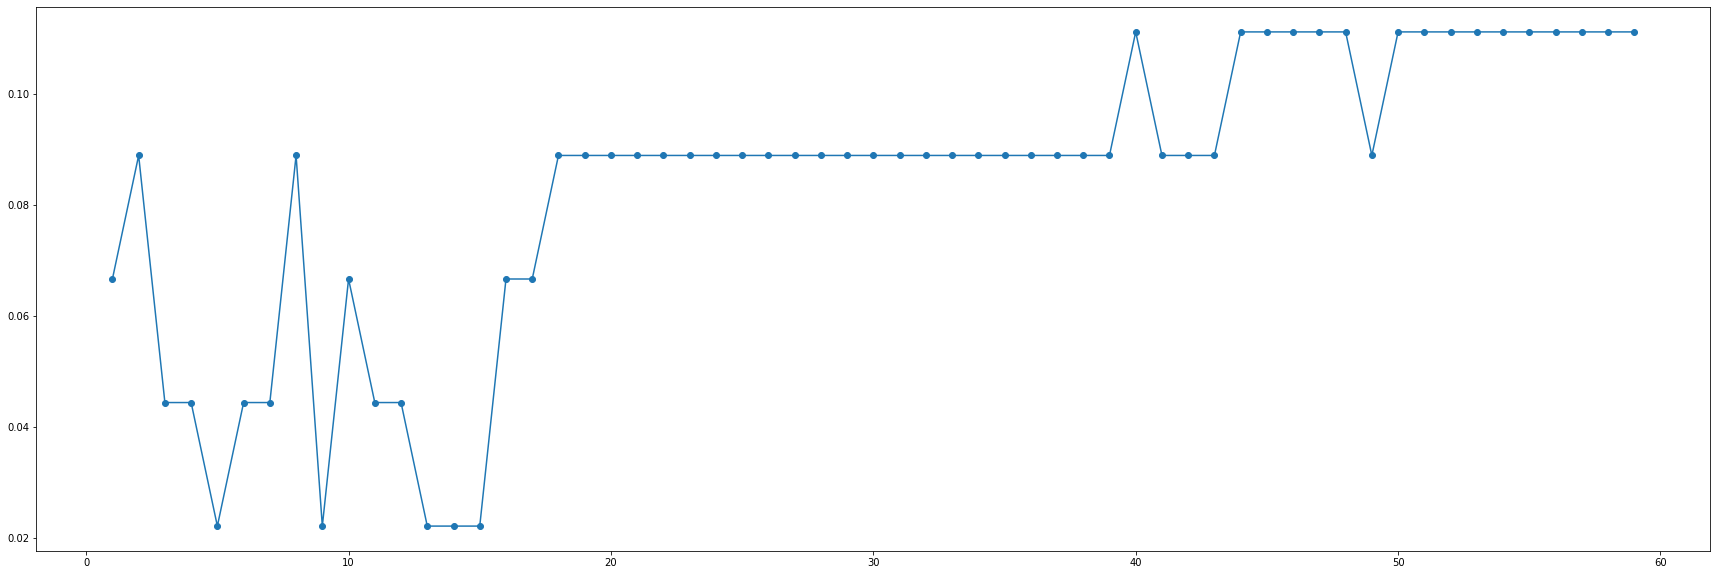

In [16]:
plt.figure(figsize=(30,10))
plt.plot(range(1,60),error, 'o-')

In [17]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X, Y)

predict=knn.predict(X_test)
print('FOR K = 9')
print(confusion_matrix(Y_test,predict))
print(classification_report(Y_test,predict))

FOR K = 9
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

